<a href="https://colab.research.google.com/github/Jin-jin-jara/Deep-Learning/blob/master/object_detection_yolo_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물체 탐지(Object detection) - YOLO Keras

DarkNet의 모델을 Keras로 변환하여 물체 탐지 실행.

https://github.com/qqwweee/keras-yolo3


yolo가 현재 케라스 버전과 호환이 안되기 때문에 삭제하고 아래 버전을 재설치하자

In [0]:
!pip uninstall keras
!pip install keras==2.1.5

Uninstalling Keras-2.2.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.2.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled Keras-2.2.5
     |████████████████████████████████| 337kB 8.3MB/s 


## 프로젝트 다운로드


In [0]:
%cd /content

!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3


/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 616.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


## YOLO3 모델 다운로드


In [0]:
%cd /content/keras-yolo3
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/keras-yolo3
--2020-01-22 08:35:00--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-01-22 08:35:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  19.9MB/s    in 13s     

2020-01-22 08:35:13 (18.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2020-01-22 08:35:13--
Total wall clock time: 14s
Downloaded: 1 files, 237M in 13s (18.5 MB/s)


## 모델 파일 변환

DarkNet의 모델파일을 Keras에서 사용할 수 있는 모델 파일로 변환한다.


- convert.py : 변환 실행 파일
- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일
- yolov3.weight : Darknet으로 학습된 모델 파일

실행 결과로 다음의 h5 파일로 변환된다. 
- yolov3.h5 : 변환된 모델 파일


In [0]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [0]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Using TensorFlow backend.


Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead






Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section 

## 물체 탐지 실행

다음의 파일이 사용된다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


--2020-01-22 06:54:20--  http://vrealitymedia.com/wp-content/uploads/2015/07/apt31.jpg
Resolving vrealitymedia.com (vrealitymedia.com)... 183.111.174.31
Connecting to vrealitymedia.com (vrealitymedia.com)|183.111.174.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41891 (41K) [image/jpeg]
Saving to: ‘kitchen.jpg’

kitchen.jpg         100%[===================>]  40.91K  --.-KB/s    in 0.09s   

2020-01-22 06:54:20 (445 KB/s) - ‘kitchen.jpg’ saved [41891/41891]



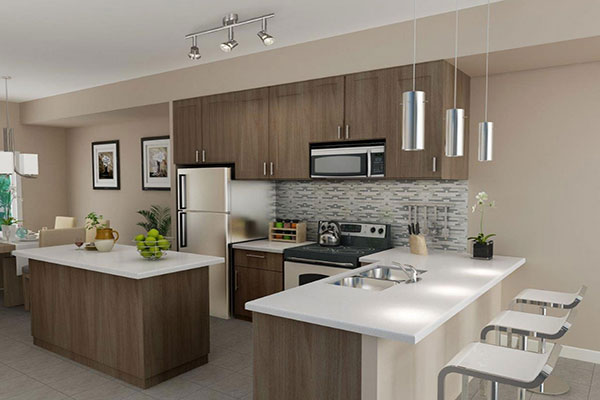

In [0]:
!wget -O kitchen.jpg http://vrealitymedia.com/wp-content/uploads/2015/07/apt31.jpg

from IPython.display import Image, display
display(Image(filename='kitchen.jpg'))

--2020-01-22 06:41:03--  https://pgnqdrjultom1827145.cdn.ntruss.com/img/93/84/9384201fd5285dd8303d29f856151753666c80f453c3e7ca7e649f1006e6131a_v1.jpg
Resolving pgnqdrjultom1827145.cdn.ntruss.com (pgnqdrjultom1827145.cdn.ntruss.com)... 101.79.136.49, 183.111.24.144, 183.111.25.18
Connecting to pgnqdrjultom1827145.cdn.ntruss.com (pgnqdrjultom1827145.cdn.ntruss.com)|101.79.136.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 285427 (279K) [image/jpeg]
Saving to: ‘street_view2.jpg’

street_view2.jpg    100%[===================>] 278.74K   462KB/s    in 0.6s    

2020-01-22 06:41:04 (462 KB/s) - ‘street_view2.jpg’ saved [285427/285427]



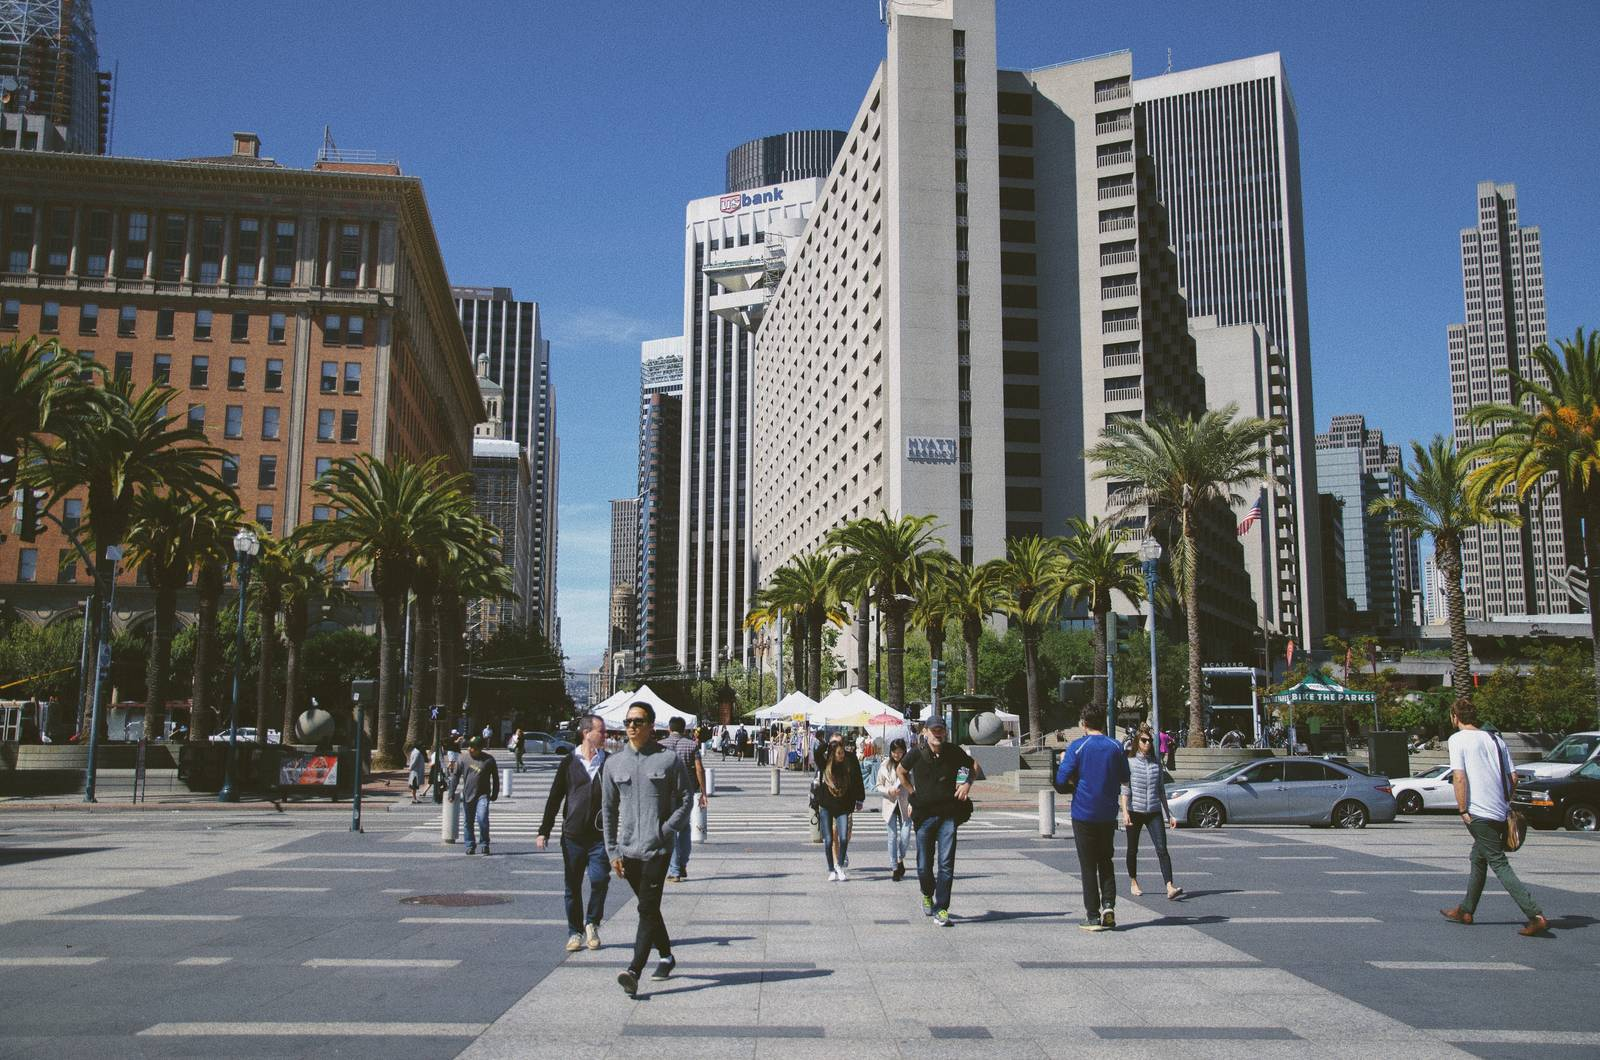

In [0]:
!wget -O street_view2.jpg https://pgnqdrjultom1827145.cdn.ntruss.com/img/93/84/9384201fd5285dd8303d29f856151753666c80f453c3e7ca7e649f1006e6131a_v1.jpg

from IPython.display import Image, display
display(Image(filename='street_view2.jpg'))

--2020-01-22 06:25:09--  http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg
Resolving beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)... 94.31.29.99
Connecting to beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)|94.31.29.99|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89406 (87K) [image/jpeg]
Saving to: ‘street_view.jpg’

street_view.jpg     100%[===================>]  87.31K   272KB/s    in 0.3s    

2020-01-22 06:25:10 (272 KB/s) - ‘street_view.jpg’ saved [89406/89406]



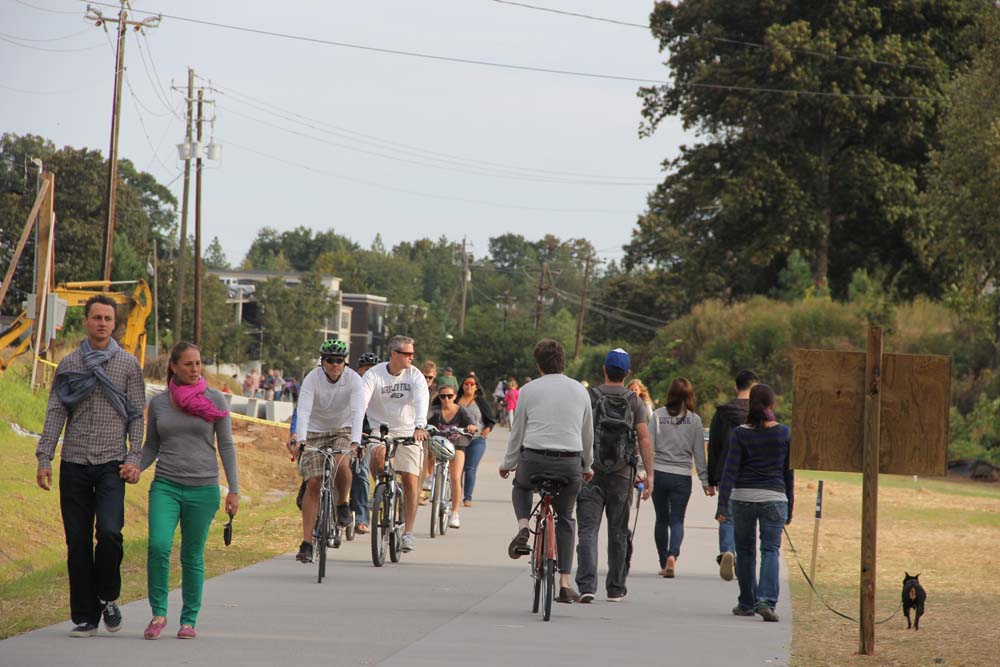

In [0]:
!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
display(Image(filename='street_view.jpg')) 

In [0]:
!cat model_data/coco_classes.txt

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [0]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  image = Image.open(file)
  result_image = yolo.detect_image(image)

  display(result_image)


yolov3.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 18 boxes for img
vase 0.31 (95, 231) (117, 251)
refrigerator 0.91 (178, 164) (232, 309)
sink 0.37 (328, 267) (424, 288)
oven 0.84 (280, 223) (397, 289)
microwave 0.98 (303, 141) (392, 177)
diningtable 0.33 (232, 241) (566, 400)
pottedplant 0.31 (468, 223) (496, 258)
pottedplant 0.41 (134, 200) (174, 259)
pottedplant 0.42 (78, 208) (119, 249)
pottedplant 0.61 (462, 195) (502, 258)
chair 0.30 (490, 284) (586, 336)
chair 0.47 (437, 334) (560, 399)
chair 0.64 (54, 214) (76, 229)
chair 0.72 (38, 225) (85, 247)
chair 0.80 (434, 290) (593, 394)
orange 0.32 (149, 233) (162, 244)
knife 0.30 (414, 220) (420, 233)
knife 0.58 (410, 222) (415, 234)
6.935506676999921


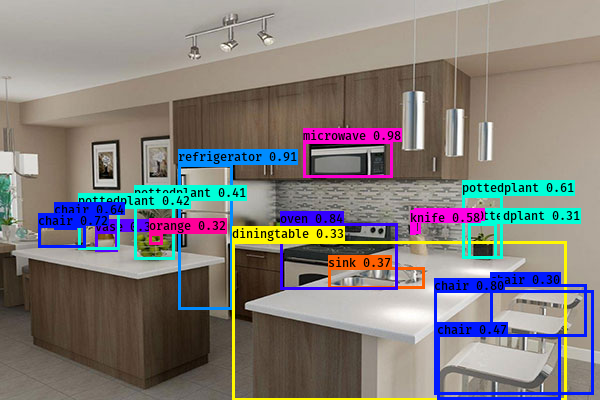

In [0]:
do_object_detection('kitchen.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')

yolov3.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 18 boxes for img
umbrella 0.43 (814, 692) (897, 724)
umbrella 0.82 (758, 694) (821, 721)
car 0.31 (1384, 770) (1461, 810)
car 0.67 (1502, 730) (1599, 833)
car 1.00 (1149, 755) (1422, 830)
person 0.33 (437, 740) (456, 797)
person 0.38 (771, 728) (794, 786)
person 0.58 (879, 741) (916, 883)
person 0.67 (666, 718) (710, 879)
person 0.78 (407, 739) (430, 801)
person 0.90 (538, 716) (608, 948)
person 0.92 (813, 728) (865, 877)
person 0.95 (1125, 726) (1181, 896)
person 0.97 (457, 734) (498, 856)
person 0.98 (902, 715) (987, 917)
person 0.99 (1049, 708) (1133, 926)
person 0.99 (1433, 699) (1555, 929)
person 1.00 (588, 699) (695, 997)
6.196299292000049


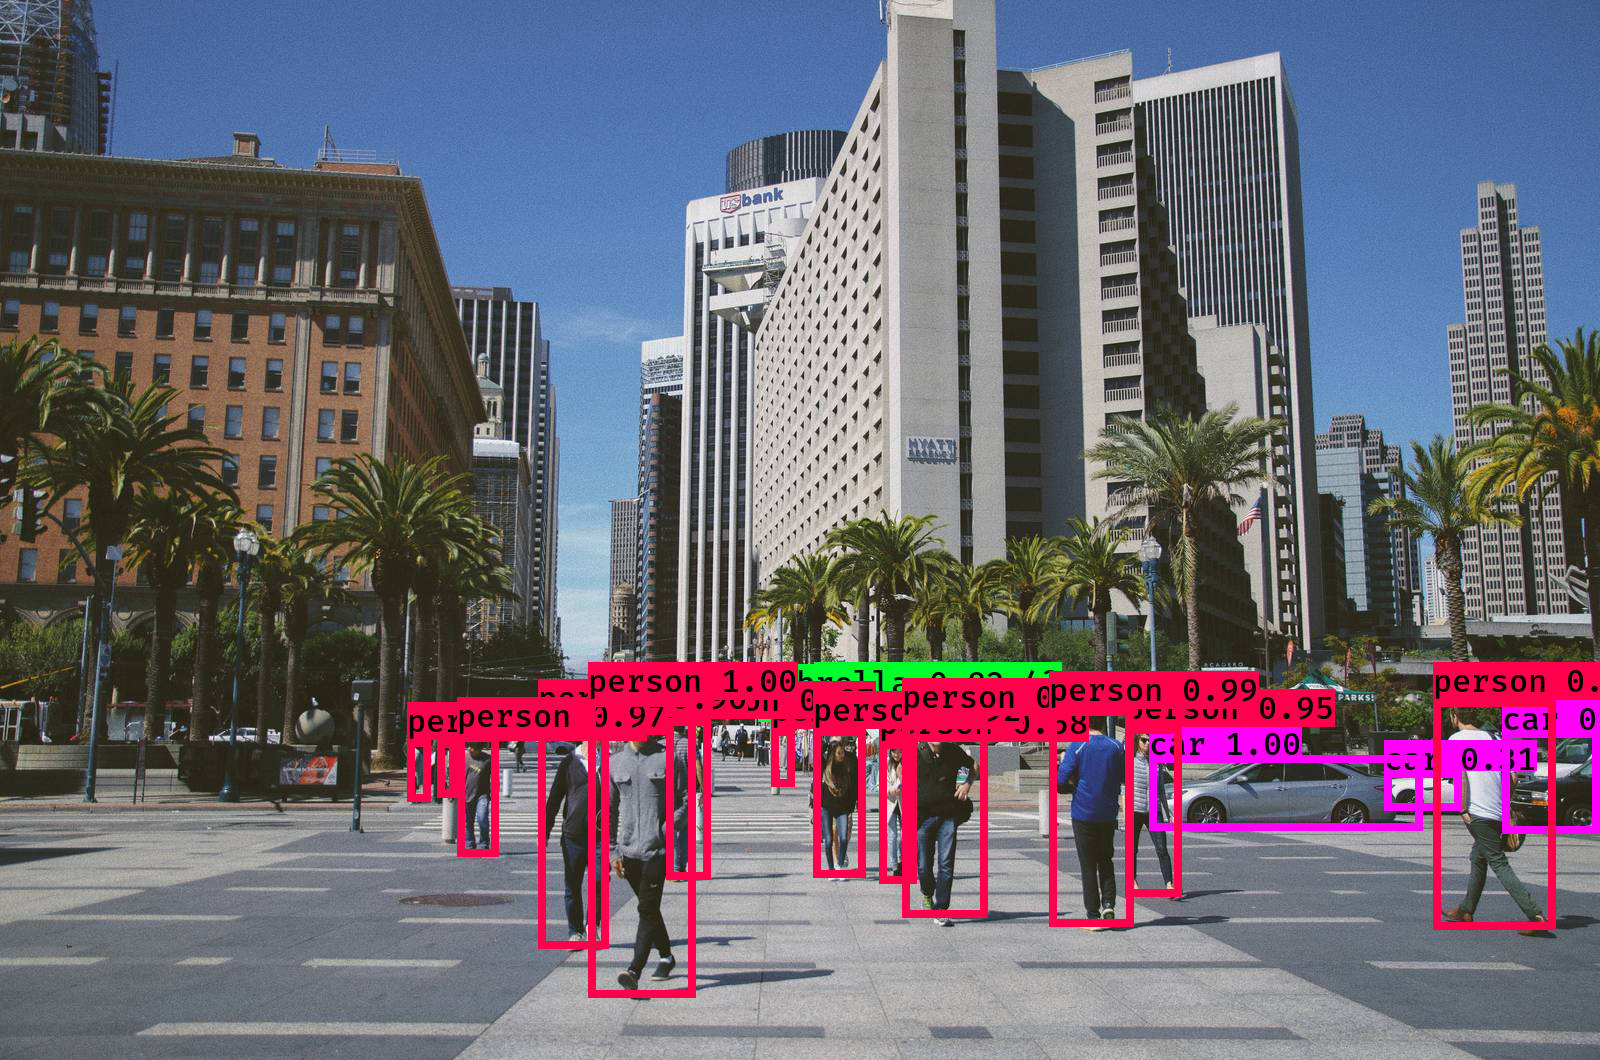

In [0]:
do_object_detection('street_view2.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')

In [0]:
do_object_detection('street_view.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')



yolov3.h5 model, anchors, and classes loaded.


AttributeError: ignored

# 커스텀 데이터 학습


## 커스터 데이터 다운로드

standford dogs 데이터셋 중 10개 클래스만 추린 데이타

In [0]:
%cd /content/keras-yolo3

!rm -rf dogs.tar.gz

!wget https://github.com/dhrim/bmac_seminar/raw/master/material/dogs.tar.gz


/content/keras-yolo3
--2020-01-22 08:30:25--  https://github.com/dhrim/bmac_seminar/raw/master/material/dogs.tar.gz
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/bmac_seminar/master/material/dogs.tar.gz [following]
--2020-01-22 08:30:25--  https://raw.githubusercontent.com/dhrim/bmac_seminar/master/material/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         100%[===================>]  59.97M   342MB/s    in 0.2s    

2020-01-22 08:30:25 (342 MB/s) - ‘dogs.tar.gz’ saved [62885106/62885106]



In [0]:
%cd /content/keras-yolo3

!rm -rf dogs

!tar xfz dogs.tar.gz

!ls -al dogs | head -10

/content/keras-yolo3
total 128
drwxr-xr-x 12  501 staff  4096 Jul 23  2019 .
drwxr-xr-x  7 root root   4096 Jan 22 08:30 ..
drwxr-xr-x  2  501 staff 12288 Jan 22 08:30 n02085620-Chihuahua
drwxr-xr-x  2  501 staff 12288 Jan 22 08:30 n02085782-Japanese_spaniel
drwxr-xr-x  2  501 staff 12288 Jan 22 08:30 n02085936-Maltese_dog
drwxr-xr-x  2  501 staff 12288 Jan 22 08:30 n02086079-Pekinese
drwxr-xr-x  2  501 staff 12288 Jan 22 08:30 n02086240-Shih-Tzu
drwxr-xr-x  2  501 staff 12288 Jan 22 08:30 n02086646-Blenheim_spaniel
drwxr-xr-x  2  501 staff 12288 Jan 22 08:30 n02086910-papillon


## 데이터 준비

2개의 파일

- 클래스 파일
- 레이블링 파일

그리고 이미지 파일들

In [0]:
!wget https://github.com/dhrim/bmac_seminar/raw/master/material/dogs_classes.txt
!wget https://github.com/dhrim/bmac_seminar/raw/master/material/dogs_annotations.txt
  

--2020-01-22 08:30:58--  https://github.com/dhrim/bmac_seminar/raw/master/material/dogs_classes.txt
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/bmac_seminar/master/material/dogs_classes.txt [following]
--2020-01-22 08:30:58--  https://raw.githubusercontent.com/dhrim/bmac_seminar/master/material/dogs_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228 [text/plain]
Saving to: ‘dogs_classes.txt’

dogs_classes.txt    100%[===================>]     228  --.-KB/s    in 0s      

2020-01-22 08:30:58 (72.5 MB/s) - ‘dogs_classes.txt’ saved [228/228]

--2020-01-22 08:31:01--  https://gith

In [0]:
!cat dogs_classes.txt

n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
n02088094-Afghan_hound


In [0]:
!wc dogs_annotations.txt
!head -10 dogs_annotations.txt

  1918   3934 122615 dogs_annotations.txt
dogs/n02086240-Shih-Tzu/n02086240_8825.jpg 97,46,436,464,0
dogs/n02086240-Shih-Tzu/n02086240_4608.jpg 0,100,496,371,0
dogs/n02086240-Shih-Tzu/n02086240_1779.jpg 213,114,361,331,0
dogs/n02086240-Shih-Tzu/n02086240_5352.jpg 0,57,375,491,0
dogs/n02086240-Shih-Tzu/n02086240_9098.jpg 156,9,348,375,0
dogs/n02086240-Shih-Tzu/n02086240_963.jpg 0,8,325,492,0
dogs/n02086240-Shih-Tzu/n02086240_5541.jpg 63,105,345,284,0
dogs/n02086240-Shih-Tzu/n02086240_7100.jpg 6,23,372,456,0
dogs/n02086240-Shih-Tzu/n02086240_4629.jpg 32,57,451,373,0
dogs/n02086240-Shih-Tzu/n02086240_1958.jpg 43,16,375,495,0


## 학습 실행

학습에 필요한 파일은 3개이다.

- 클래스 파일
- 레이블링 파일
- 기반 학습 모델




그런데 2019/08/07 현재 이 파일 이름들은 train.py안에 하드코딩 되어있다.
- 클래스 파일 : model_data/voc_classes.txt
- 레이블링 파일 : train.txt
- 기반 학습 모델 : model_data/yolo_weights.h5

하드 코딩된 바 대로 이름을 변경하고 실행한다.



In [0]:
![ ! -f model_data/voc_classes.txt.org ] && mv model_data/voc_classes.txt model_data/voc_classes.txt.org
![ ! -f train.txt.org ] && mv train.txt train.txt.org
![ ! -f model_data/yolo_wieghts.org ] && mv model_data/yolo_weights.h5 model_data/yolo_wieghts.h5.org

![ ! -f model_data/voc_classes.txt ] && cp dogs_classes.txt model_data/voc_classes.txt
![ ! -f train.txt ] && cp dogs_annotations.txt train.txt
![ ! -f model_data/yolo_weights.h5 ] && cp yolov3.h5 model_data/yolo_weights.h5


mv: cannot stat 'train.txt': No such file or directory
mv: cannot stat 'model_data/yolo_weights.h5': No such file or directory
cp: cannot stat 'yolov3.h5': No such file or directory


In [0]:
!ls -al *.txt

-rw-r--r-- 1 root root 122615 Jan 22 08:31 dogs_annotations.txt
-rw-r--r-- 1 root root    228 Jan 22 08:30 dogs_classes.txt
-rw-r--r-- 1 root root 122615 Jan 22 08:32 train.txt


In [0]:
!python3 train.py

Using TensorFlow backend.








2020-01-22 08:34:19.990520: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-22 08:34:20.049310: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000170000 Hz
2020-01-22 08:34:20.051952: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1c50bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-22 08:34:20.051994: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-22 08:34:20.056057: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-22 08:34:20.219894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [0]:
!nvidia-smi

Wed Jan 22 08:32:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  